[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


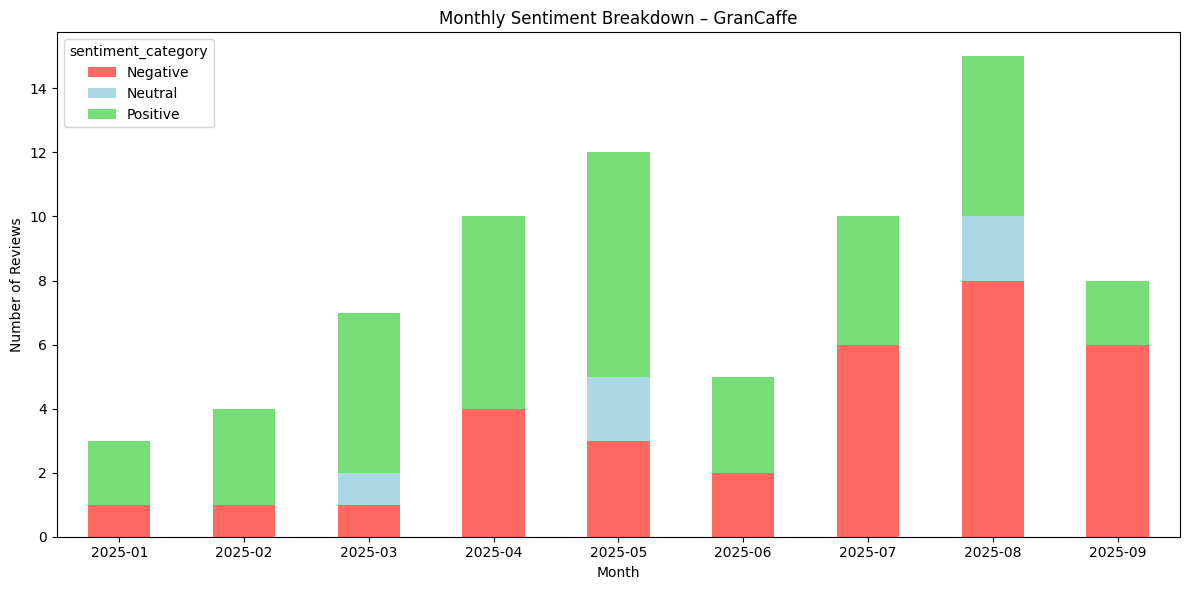

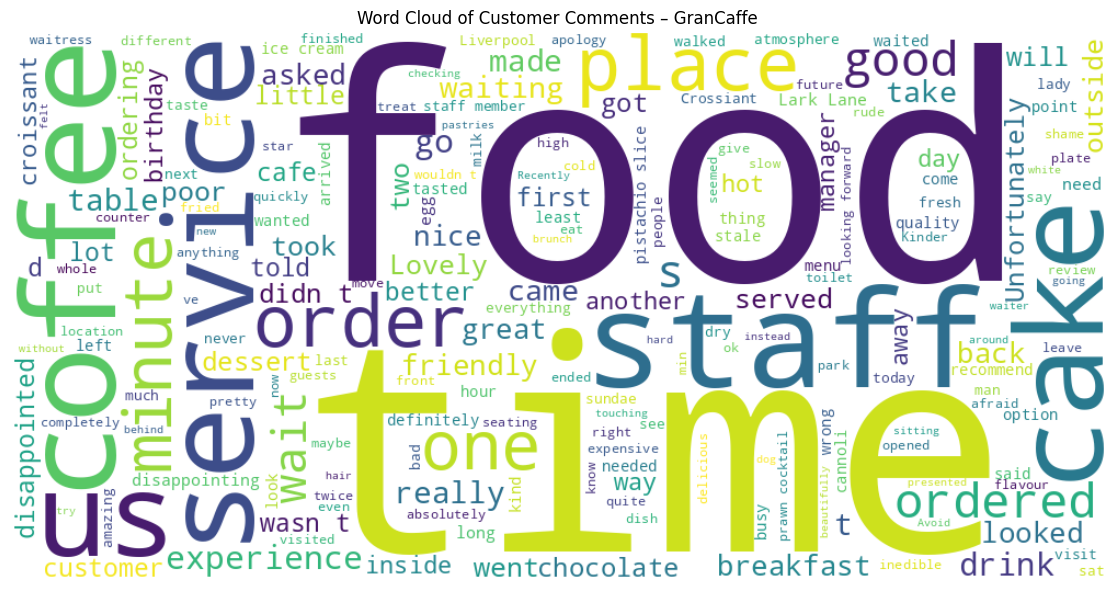

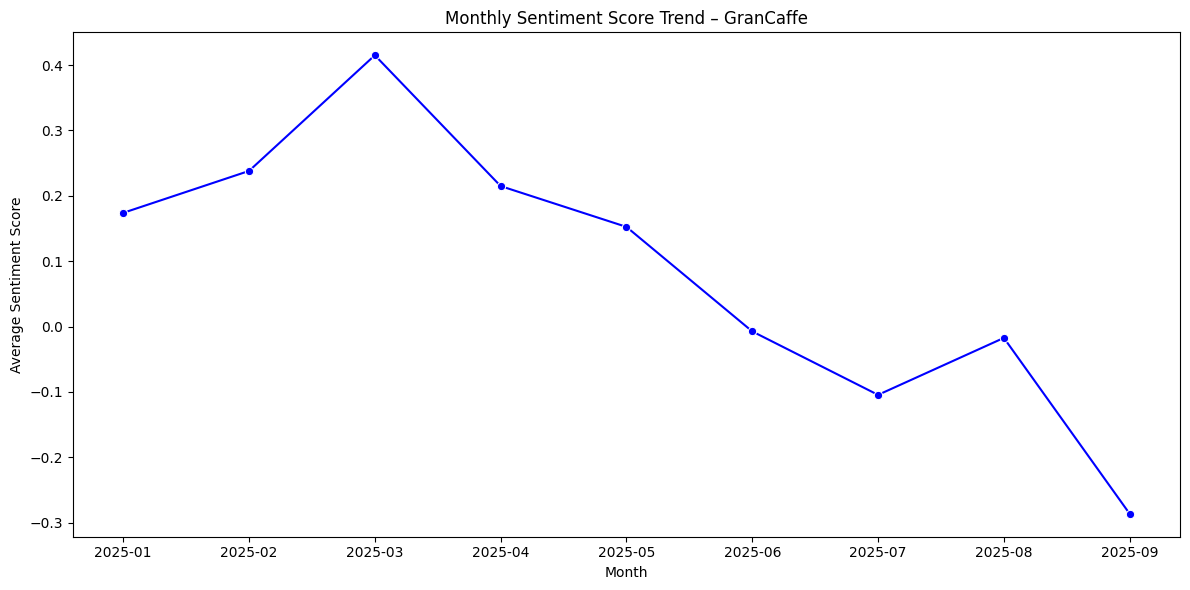

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk

# Step 1: Download VADER model
nltk.download('vader_lexicon')

# Step 2: Load Excel file
df = pd.read_excel("GranCaffe.xlsx")  # Adjust path if needed

# Step 3: Convert date and extract month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Step 4: Initialize NLTK Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 5: Apply VADER sentiment analysis
df['sentiment_score'] = df['Comment'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 6: Categorize sentiment
df['sentiment_category'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral'
)

# Step 7: Monthly sentiment breakdown
monthly_sentiment = df.groupby(['Month', 'sentiment_category']).size().unstack(fill_value=0)
monthly_sentiment = monthly_sentiment.loc[sorted(monthly_sentiment.index)]

# Ensure all categories are present before plotting
categories_to_plot = ['Negative', 'Neutral', 'Positive']
for cat in categories_to_plot:
    if cat not in monthly_sentiment.columns:
        monthly_sentiment[cat] = 0

# ------------------------------
# PLOT A: Stacked Bar Chart
# ------------------------------
plt.figure(figsize=(12, 6))
monthly_sentiment[categories_to_plot].plot(
    kind='bar',
    stacked=True,
    color=['#ff6961', '#add8e6', '#77dd77'],  # red, lightblue, green
    ax=plt.gca()
)
plt.title('Monthly Sentiment Breakdown – Panoramic34')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ------------------------------
# PLOT B: Word Cloud
# ------------------------------
text = ' '.join(df['Comment'].dropna().astype(str))
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=STOPWORDS
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Comments – Panoramic34')
plt.tight_layout()
plt.show()

# ------------------------------
# PLOT C: Line Chart of Sentiment Score
# ------------------------------
monthly_score = df.groupby('Month')['sentiment_score'].mean().reset_index()
monthly_score = monthly_score.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_score, x='Month', y='sentiment_score', marker='o', color='blue')
plt.title('Monthly Sentiment Score Trend – Panoramic34')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

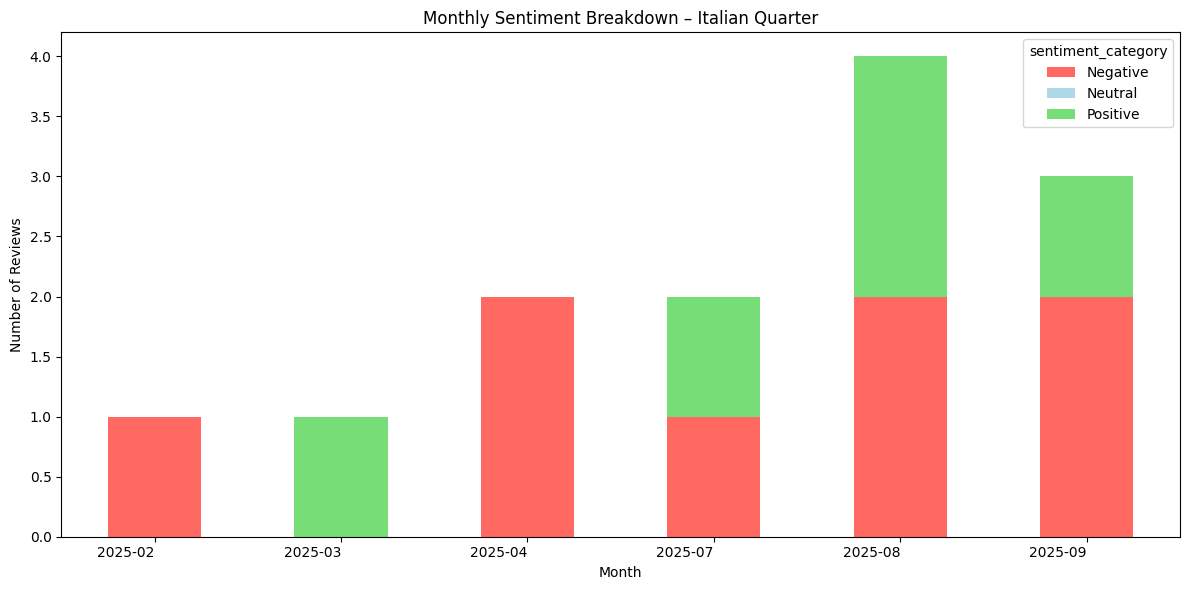

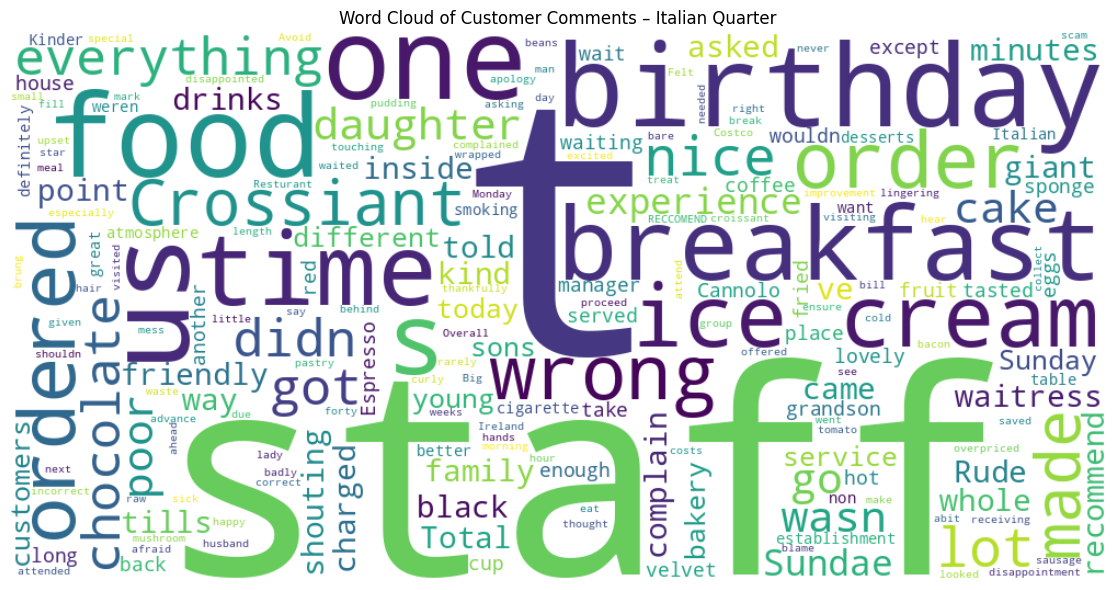

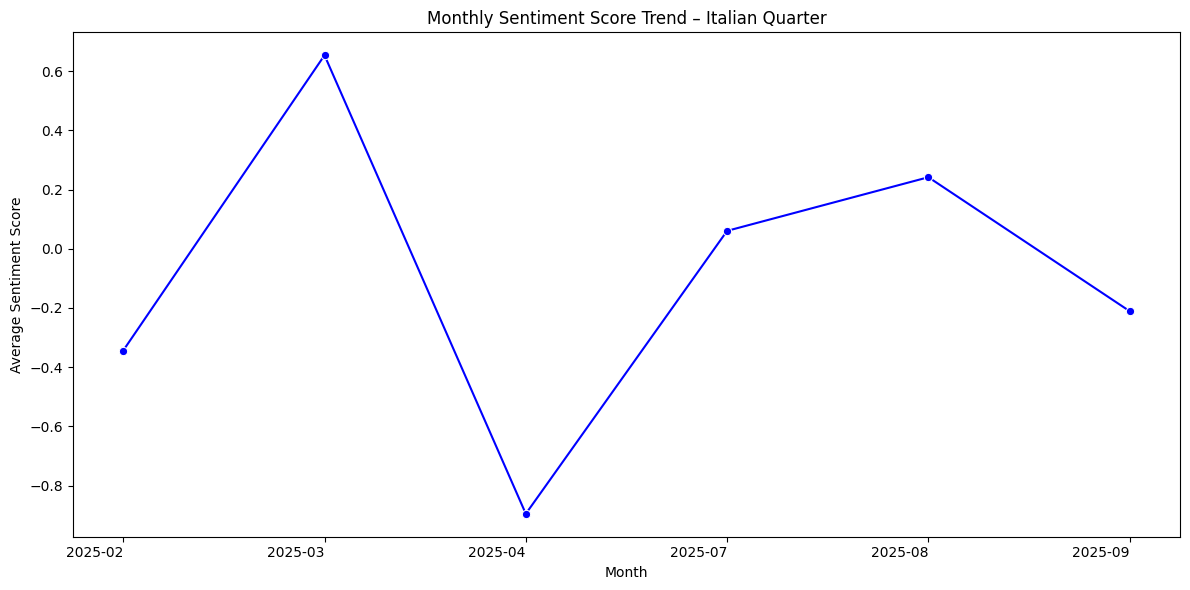

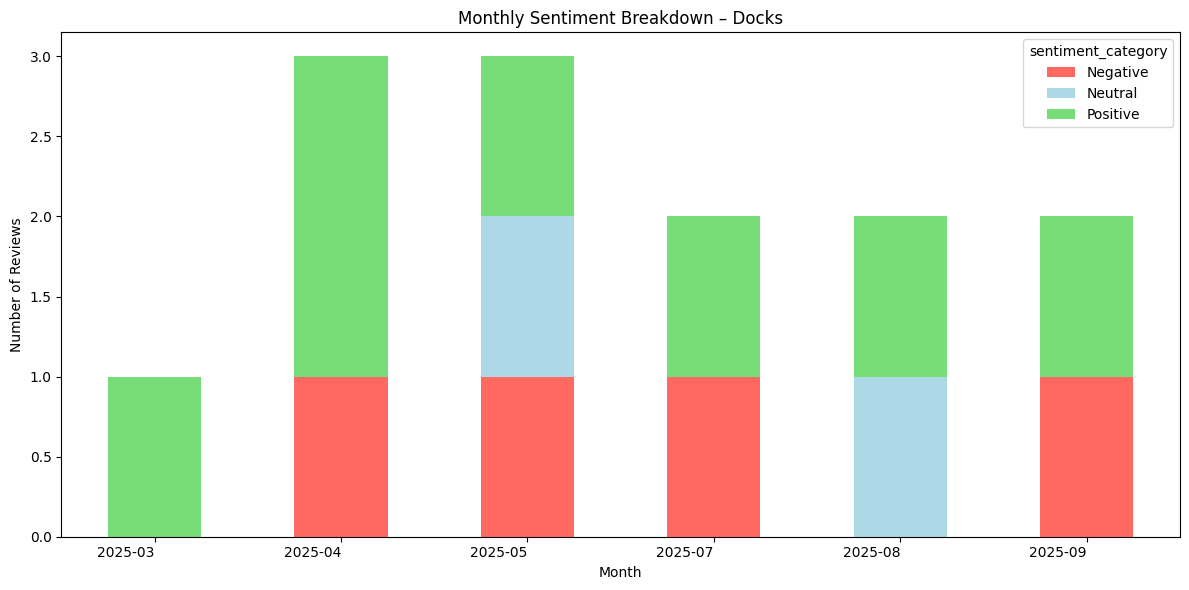

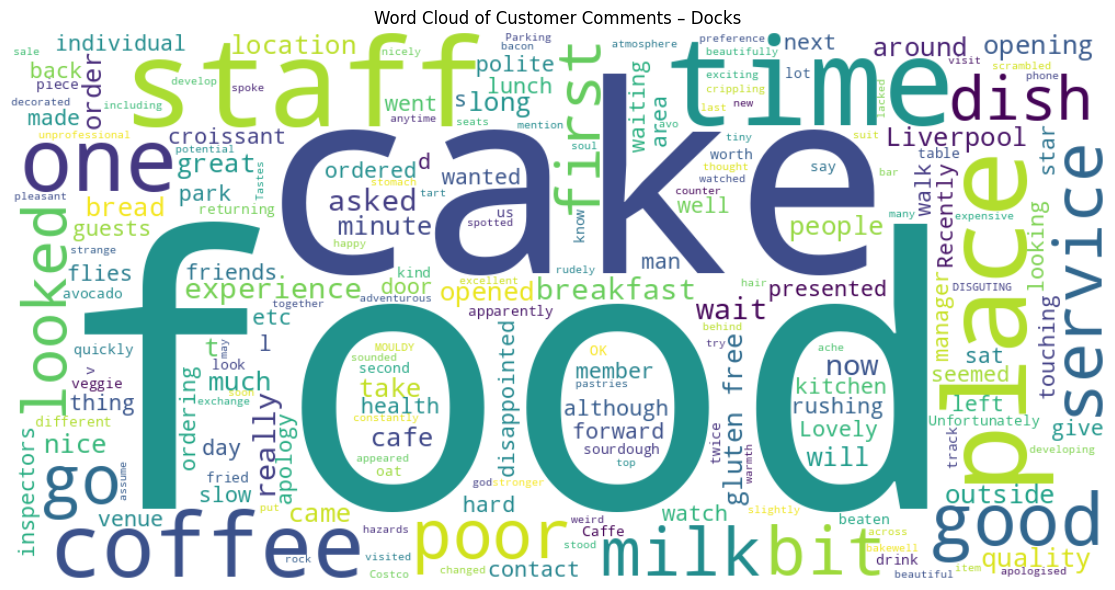

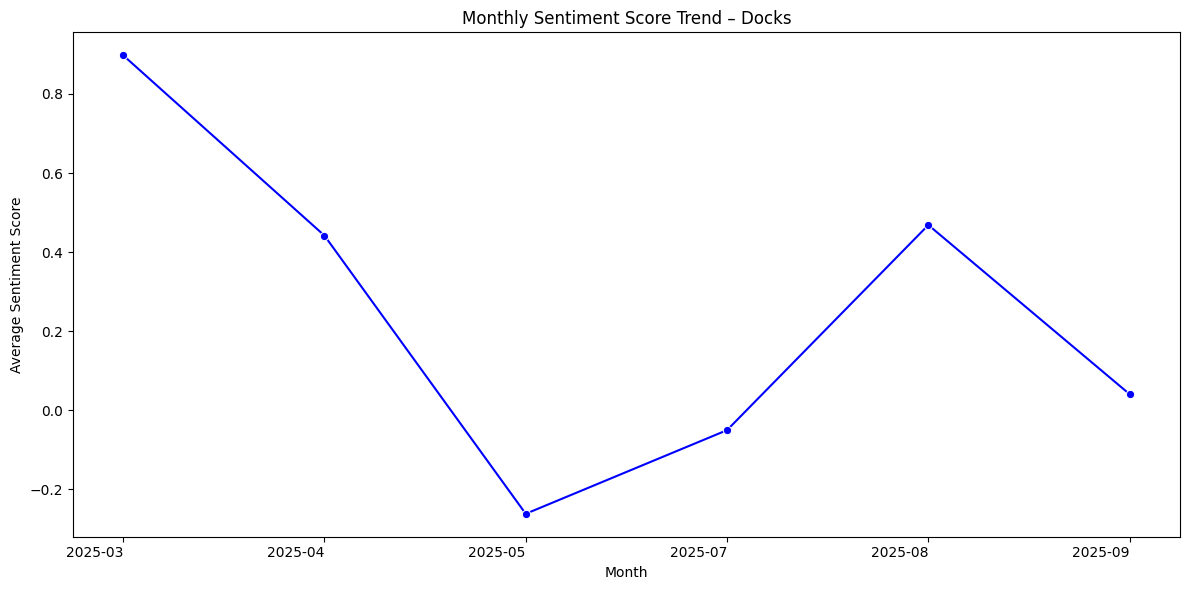

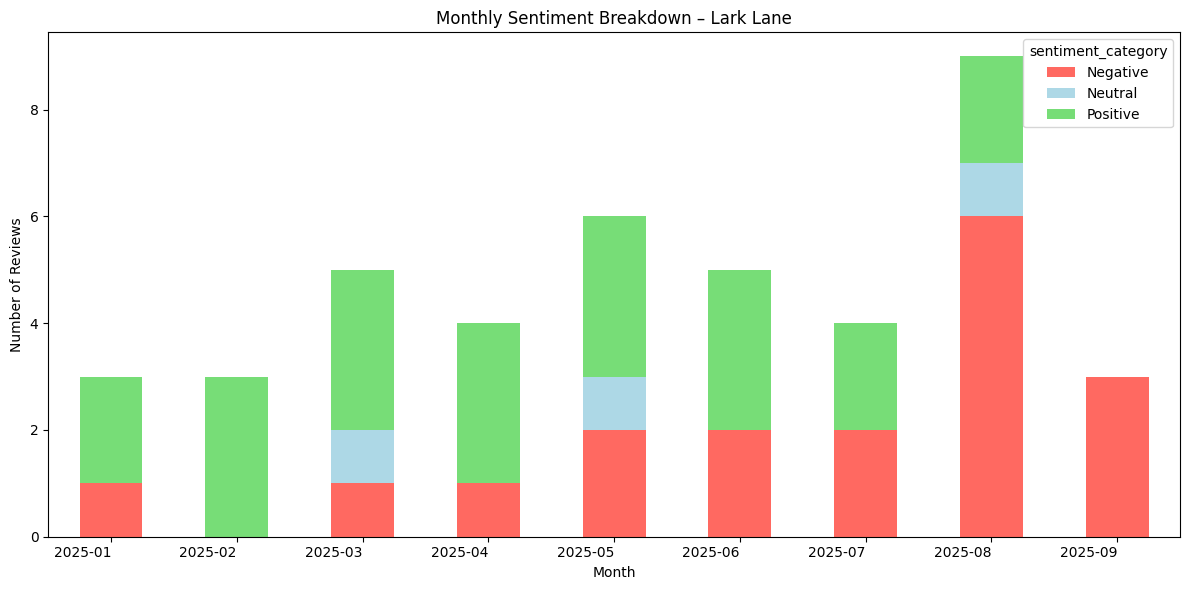

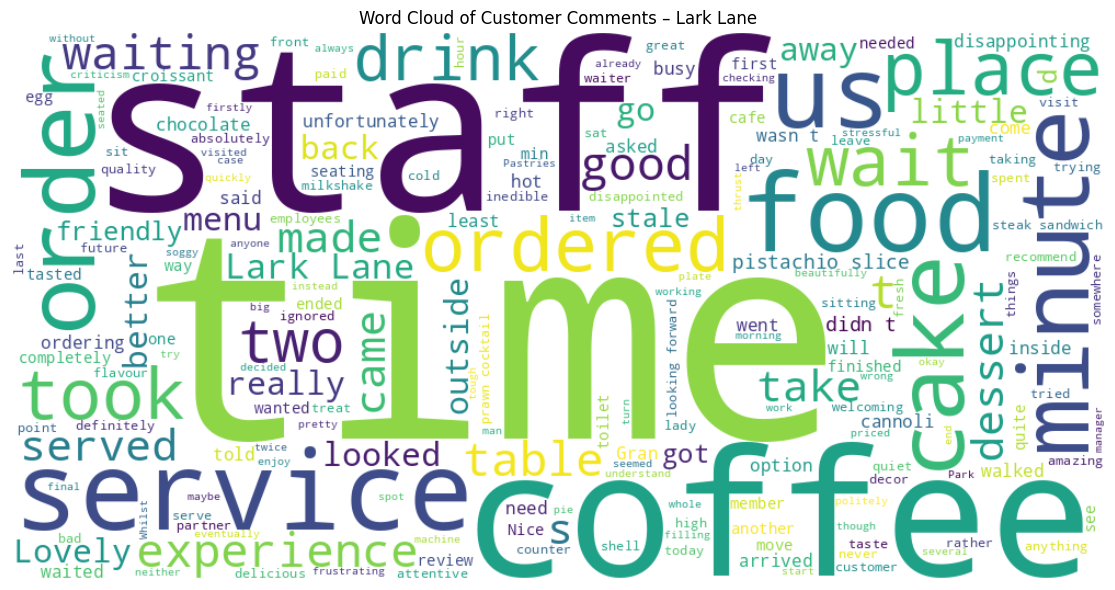

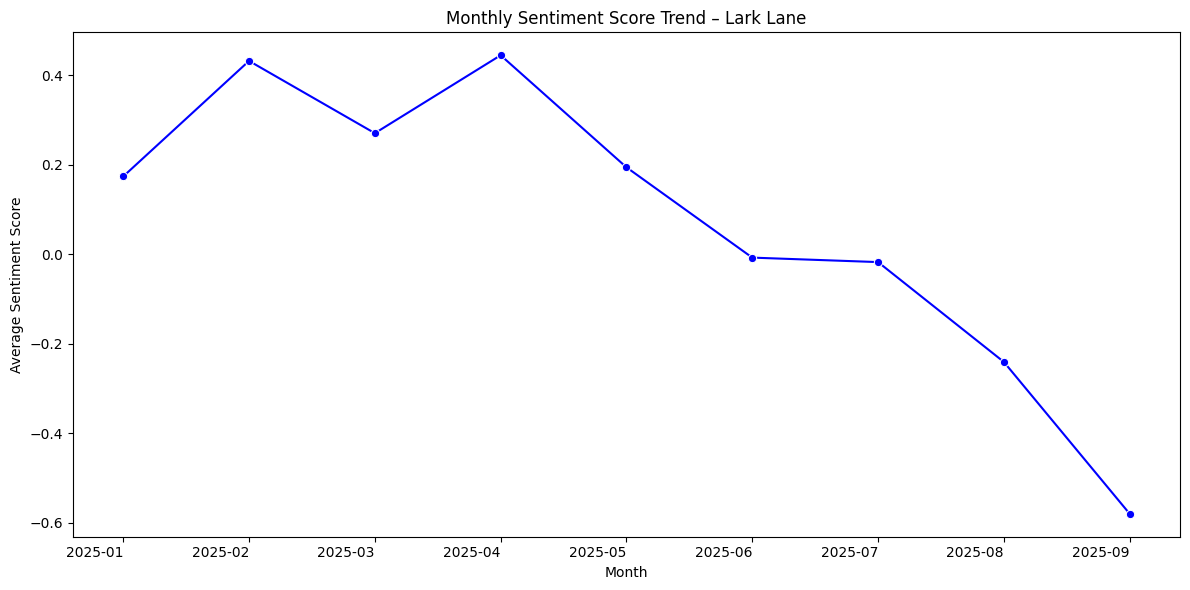

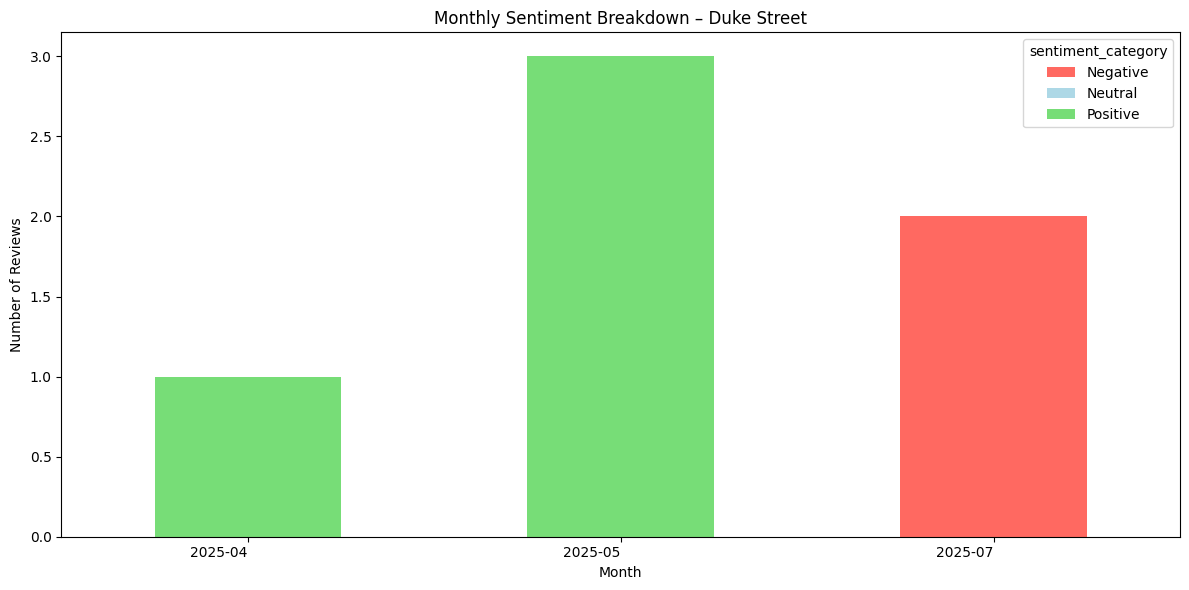

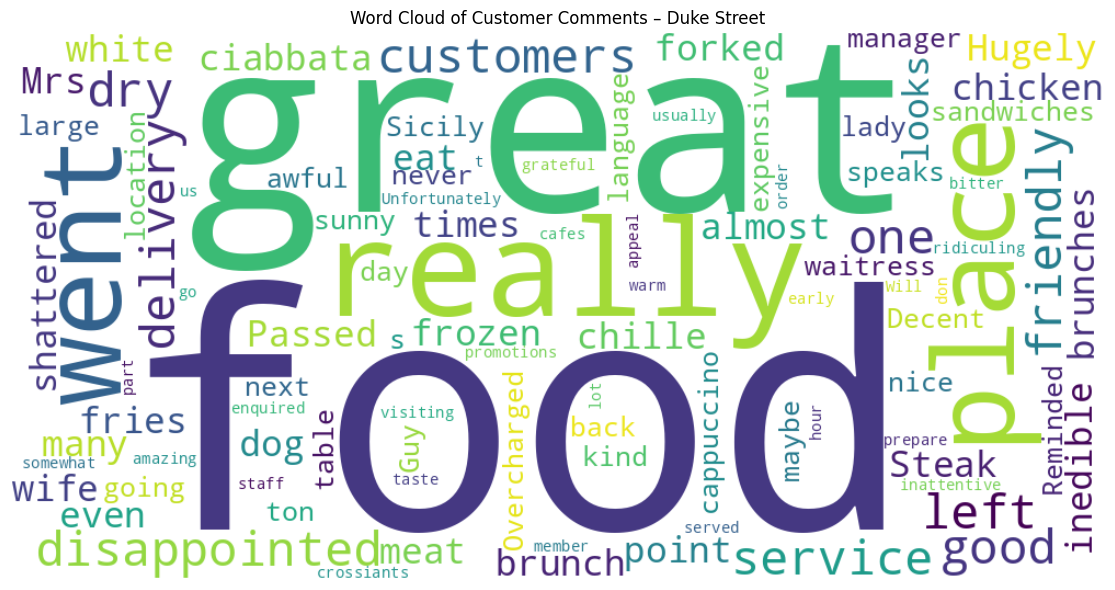

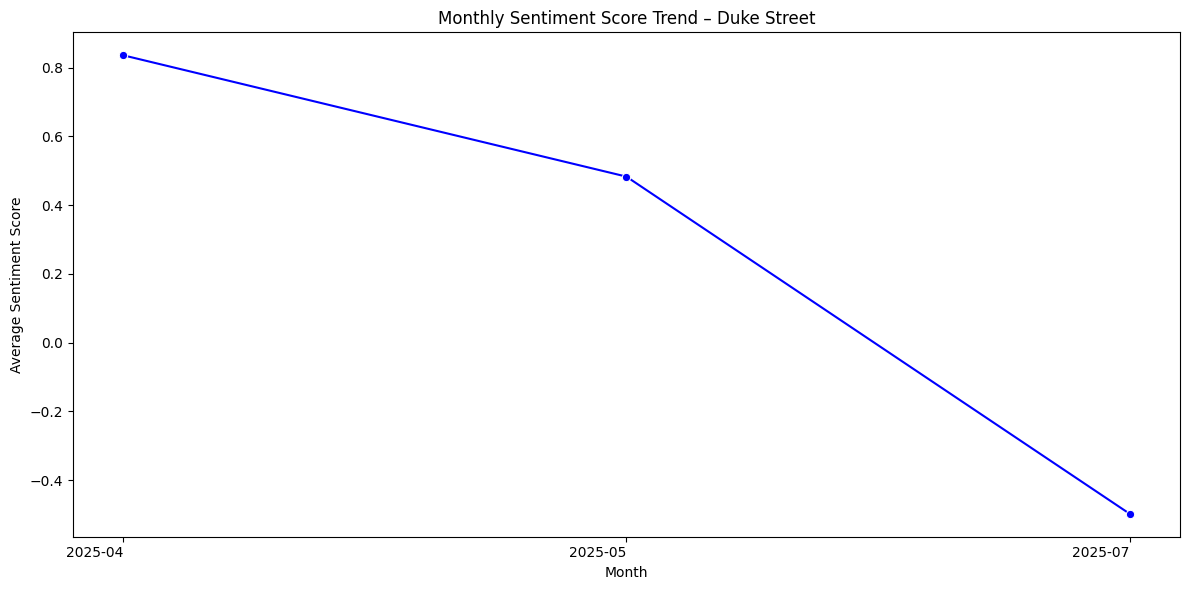

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk

# Step 1: Download VADER model
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Step 2: Load Excel file (Grancaffe data)
try:
    df_grancaffe = pd.read_excel("GranCaffe.xlsx")  # Load the Grancaffe data
except FileNotFoundError:
    print("Error: GranCaffe.xlsx not found. Please make sure the file is in the correct directory.")
    exit() # Exit if file not found

# Step 3: Convert date and extract month
df_grancaffe['Date'] = pd.to_datetime(df_grancaffe['Date'], errors='coerce')
df_grancaffe.dropna(subset=['Date'], inplace=True)
df_grancaffe['Month'] = df_grancaffe['Date'].dt.to_period('M').astype(str)

# Step 4: Initialize NLTK Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 5: Apply VADER sentiment analysis
# Use 'Comment' column for sentiment analysis
df_grancaffe['sentiment_score'] = df_grancaffe['Comment'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 6: Categorize sentiment
df_grancaffe['sentiment_category'] = df_grancaffe['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral'
)

# Step 7: Analyze and visualize sentiment by Site and Month

sites = df_grancaffe['Site'].unique()

for site in sites:
    site_df = df_grancaffe[df_grancaffe['Site'] == site].copy()

    # Monthly sentiment breakdown for the site
    monthly_site_sentiment = site_df.groupby(['Month', 'sentiment_category']).size().unstack(fill_value=0)
    monthly_site_sentiment = monthly_site_sentiment.loc[sorted(monthly_site_sentiment.index)] # Sort by month

    # ------------------------------
    # PLOT A: Stacked Bar Chart for the site
    # ------------------------------
    plt.figure(figsize=(12, 6))
    # Ensure all categories are present before plotting
    categories_to_plot = ['Negative', 'Neutral', 'Positive']
    for cat in categories_to_plot:
        if cat not in monthly_site_sentiment.columns:
            monthly_site_sentiment[cat] = 0

    monthly_site_sentiment[categories_to_plot].plot(
        kind='bar',
        stacked=True,
        color=['#ff6961', '#add8e6', '#77dd77'],  # red, lightblue, green
        ax=plt.gca()
    )
    plt.title(f'Monthly Sentiment Breakdown – {site}')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=0, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

    # ------------------------------
    # PLOT B: Word Cloud for the site
    # ------------------------------
    site_comments = ' '.join(site_df['Comment'].dropna().astype(str))
    if site_comments: # Generate word cloud only if there are comments
        wordcloud = WordCloud(
            width=1000,
            height=500,
            background_color='white',
            stopwords=STOPWORDS
        ).generate(site_comments)

        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of Customer Comments – {site}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No comments to generate a word cloud for {site}")


    # ------------------------------
    # PLOT C: Line Chart of Sentiment Score for the site
    # ------------------------------
    monthly_site_score = site_df.groupby('Month')['sentiment_score'].mean().reset_index()
    monthly_site_score = monthly_site_score.sort_values('Month')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_site_score, x='Month', y='sentiment_score', marker='o', color='blue')
    plt.title(f'Monthly Sentiment Score Trend – {site}')
    plt.xlabel('Month')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=0, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()